# Backtesting of predctions

## Author: Danilo Filippo Reiszel Pereira
Univesidade Federal do Rio de Janeiro

This notebook contains the creation a Multi-layer Perceptron model to predict D+1 closing prices of PETR4 stocks, using as input 10 delays of its return series and some auxiliary series, with backtesting of the predictions

In [1]:
from __future__ import print_function, division
import sys, os
sys.path.append('../../src')
import time 
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralstocks.dataacquisition import *
from neuralstocks.plots import *
from neuralstocks.utils import *

%matplotlib inline

# Global Params
Setting global params and useful variables, such as directories and image styling

In [2]:
saveFigDir = './Figures'
os.makedirs(saveFigDir) if not os.path.exists(saveFigDir) else print('', end='\r')

pathPETR4 = '../MLP/residuals/PETR4/Variables/PETR4_MLP_predicted.CSV'
pathITUB4 = '../MLP/residuals/ITUB4/Variables/ITUB4_MLP_predicted.CSV'
pathVALE5 = '../MLP/residuals/VALE5/Variables/VALE5_MLP_predicted.CSV'

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

## Data Acquisition

In [3]:
init_time = time.time()

PETR4 = pd.read_csv(pathPETR4, parse_dates=['Date'], index_col='Date').sort_index()
PETR4 = PETR4[['PETR4_Close', 'PETR4_Open', 'PETR4_High', 'PETR4_Low', 'PETR4_Volume', 
               'PETR4_Close_trend', 'PETR4_Close_resid', 'PETR4_Close_predicted_MLPnorm', 'PETR4_Close_predicted_MLPstd']]
ITUB4 = pd.read_csv(pathITUB4, parse_dates=['Date'], index_col='Date').sort_index()
ITUB4 = ITUB4[['ITUB4_Close', 'ITUB4_Open', 'ITUB4_High', 'ITUB4_Low', 'ITUB4_Volume', 
               'ITUB4_Close_trend', 'ITUB4_Close_resid', 'ITUB4_Close_predicted_MLPnorm', 'ITUB4_Close_predicted_MLPstd']]
VALE5 = pd.read_csv(pathVALE5, parse_dates=['Date'], index_col='Date').sort_index()
VALE5 = VALE5[['VALE5_Close', 'VALE5_Open', 'VALE5_High', 'VALE5_Low', 'VALE5_Volume', 
               'VALE5_Close_trend', 'VALE5_Close_resid', 'VALE5_Close_predicted_MLPnorm', 'VALE5_Close_predicted_MLPstd']]

df = pd.concat([PETR4, ITUB4, VALE5], axis = 1)

end_time = time.time()
print('Time to acquire and process data: '+str(end_time-init_time)+' seconds')

Time to acquire and process data: 0.414573907852 seconds


In [4]:
df.columns

Index([u'PETR4_Close', u'PETR4_Open', u'PETR4_High', u'PETR4_Low',
       u'PETR4_Volume', u'PETR4_Close_trend', u'PETR4_Close_resid',
       u'PETR4_Close_predicted_MLPnorm', u'PETR4_Close_predicted_MLPstd',
       u'ITUB4_Close', u'ITUB4_Open', u'ITUB4_High', u'ITUB4_Low',
       u'ITUB4_Volume', u'ITUB4_Close_trend', u'ITUB4_Close_resid',
       u'ITUB4_Close_predicted_MLPnorm', u'ITUB4_Close_predicted_MLPstd',
       u'VALE5_Close', u'VALE5_Open', u'VALE5_High', u'VALE5_Low',
       u'VALE5_Volume', u'VALE5_Close_trend', u'VALE5_Close_resid',
       u'VALE5_Close_predicted_MLPnorm', u'VALE5_Close_predicted_MLPstd'],
      dtype='object')

In [5]:
p = ('2017', '2017')
print('PETR4 trend           prediction RMSE: {:.5f}'.format(calculateRMSE(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_trend'][p[0]:p[1]]).sum()))
print('PETR4 trend + ANNnorm prediction RMSE: {:.5f}'.format(calculateRMSE(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLPnorm'][p[0]:p[1]]).sum()))
print('PETR4 trend + ANNstd  prediction RMSE: {:.5f}'.format(calculateRMSE(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLPstd'][p[0]:p[1]]).sum()))
print('----------------------------------------------')
print('PETR4 trend           prediction MAE:  {:.5f}'.format(calculateMAE(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_trend'][p[0]:p[1]]).sum()))
print('PETR4 trend + ANNnorm prediction MAE:  {:.5f}'.format(calculateMAE(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLPnorm'][p[0]:p[1]]).sum()))
print('PETR4 trend + ANNstd  prediction MAE:  {:.5f}'.format(calculateMAE(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLPstd'][p[0]:p[1]]).sum()))

PETR4 trend           prediction RMSE: 0.38450
PETR4 trend + ANNnorm prediction RMSE: 0.36008
PETR4 trend + ANNstd  prediction RMSE: 0.37231
----------------------------------------------
PETR4 trend           prediction MAE:  0.27122
PETR4 trend + ANNnorm prediction MAE:  0.25229
PETR4 trend + ANNstd  prediction MAE:  0.27311


In [6]:
p = ('2017', '2017')
print('ITUB4 trend           prediction RMSE: {:.5f}'.format(calculateRMSE(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_trend'][p[0]:p[1]]).sum()))
print('ITUB4 trend + ANNnorm prediction RMSE: {:.5f}'.format(calculateRMSE(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLPnorm'][p[0]:p[1]]).sum()))
print('ITUB4 trend + ANNstd  prediction RMSE: {:.5f}'.format(calculateRMSE(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLPstd'][p[0]:p[1]]).sum()))
print('----------------------------------------------')
print('ITUB4 trend           prediction MAE:  {:.5f}'.format(calculateMAE(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_trend'][p[0]:p[1]]).sum()))
print('ITUB4 trend + ANNnorm prediction MAE:  {:.5f}'.format(calculateMAE(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLPnorm'][p[0]:p[1]]).sum()))
print('ITUB4 trend + ANNstd  prediction MAE:  {:.5f}'.format(calculateMAE(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLPstd'][p[0]:p[1]]).sum()))

ITUB4 trend           prediction RMSE: 0.70200
ITUB4 trend + ANNnorm prediction RMSE: 0.62539
ITUB4 trend + ANNstd  prediction RMSE: 0.64176
----------------------------------------------
ITUB4 trend           prediction MAE:  0.48417
ITUB4 trend + ANNnorm prediction MAE:  0.42006
ITUB4 trend + ANNstd  prediction MAE:  0.42683


In [7]:
p = ('2017', '2017')
print('VALE5 trend           prediction RMSE: {:.5f}'.format(calculateRMSE(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_trend'][p[0]:p[1]]).sum()))
print('VALE5 trend + ANNnorm prediction RMSE: {:.5f}'.format(calculateRMSE(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLPnorm'][p[0]:p[1]]).sum()))
print('VALE5 trend + ANNstd  prediction RMSE: {:.5f}'.format(calculateRMSE(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLPstd'][p[0]:p[1]]).sum()))
print('----------------------------------------------')
print('VALE5 trend           prediction MAE:  {:.5f}'.format(calculateMAE(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_trend'][p[0]:p[1]]).sum()))
print('VALE5 trend + ANNnorm prediction MAE:  {:.5f}'.format(calculateMAE(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLPnorm'][p[0]:p[1]]).sum()))
print('VALE5 trend + ANNstd  prediction MAE:  {:.5f}'.format(calculateMAE(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLPstd'][p[0]:p[1]]).sum()))

VALE5 trend           prediction RMSE: 0.82310
VALE5 trend + ANNnorm prediction RMSE: 0.74398
VALE5 trend + ANNstd  prediction RMSE: 0.76802
----------------------------------------------
VALE5 trend           prediction MAE:  0.63796
VALE5 trend + ANNnorm prediction MAE:  0.57929
VALE5 trend + ANNstd  prediction MAE:  0.58386


(<matplotlib.figure.Figure at 0x7f002acaba50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f002aea2b50>)

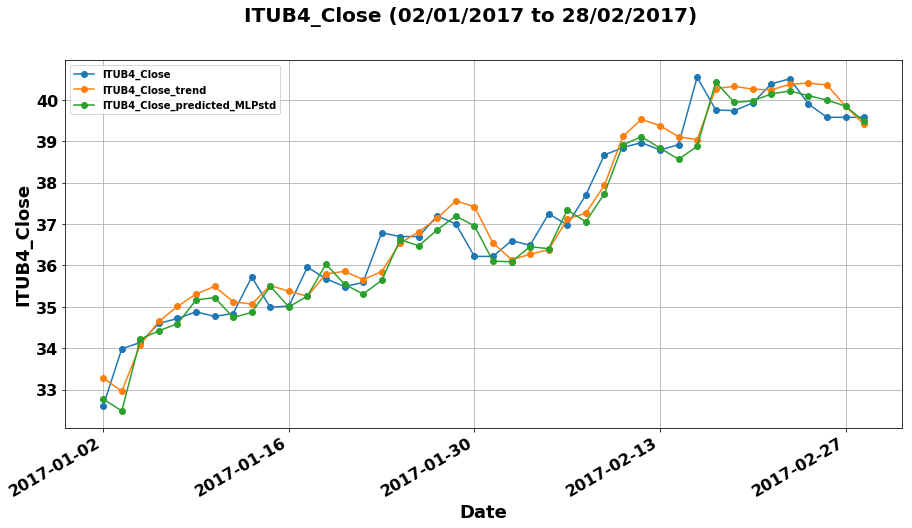

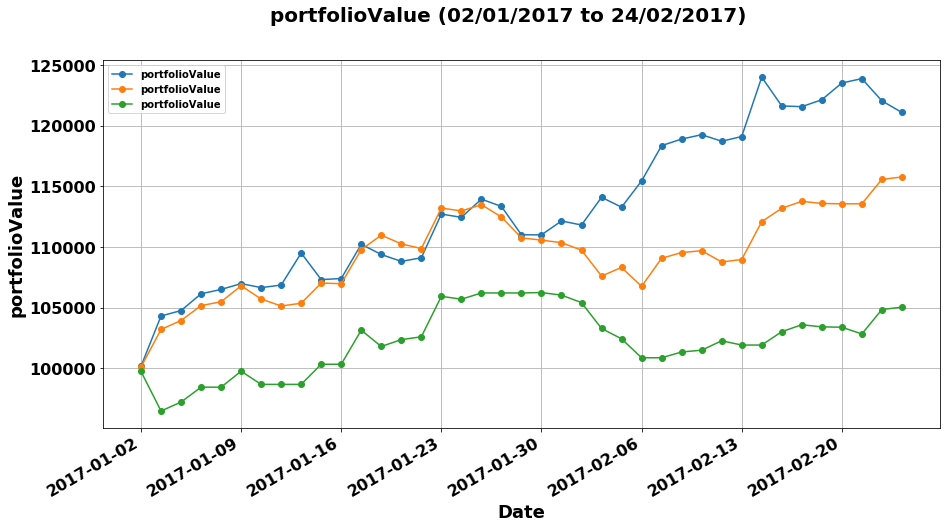

In [75]:
p = ('2017-01', '2017-02')
plotSeries2([df['ITUB4_Close'][p[0]:p[1]],
             df['ITUB4_Close_trend'][p[0]:p[1]], 
             df['ITUB4_Close_predicted_MLPstd'][p[0]:p[1]]
           ])
plotSeries2([bt.history['buy-n-hold']['portfolioValue'][p[0]:p[1]], 
             bt.history['predicted_trend']['portfolioValue'][p[0]:p[1]], 
             bt.history['predicted_mlp']['portfolioValue'][p[0]:p[1]]])

In [278]:
from __future__ import division
import random
from collections import defaultdict
from datetime import timedelta

from matplotlib.ticker import EngFormatter

class Backtest:
    oneDay = timedelta(days = 1)
    
    def __init__(self, assets, dataPath = '../../../data/stocks/[asset]/diario/[asset].CSV', initialFunds = 100000, 
                 brokerage = 6.0, transactionFees = 0.000325, ISStax = 0.05):
        self.assets = assets
        self.dataPath = dataPath
        self.funds = initialFunds
        self.brokerage = brokerage
        self.transactionFees = transactionFees
        self.ISStax = ISStax
        
        self.history = {}
        self.dailyData = {}
        self.verbose = 0;
        self.shortedFunds = 0
        self.pendingOperations = []
        self.openPositions = []
        self.strategy = ''
        self.predictedValues = {}
        
        self.useRiskManagement = False
        self.stopLoss = None
        self.stopGain = None
        self.maxExposure = None
        self.maxTotalExposure = None
        
        self.loadData()
        
    def setRiskManagement(self, stopLoss = None, stopGain = None, maxExposure = None, maxTotalExposure = None, useRiskManagement = True):
        self.useRiskManagement = useRiskManagement
        self.stopLoss = stopLoss
        self.stopGain = stopGain
        self.maxExposure = maxExposure
        self.maxTotalExposure = maxTotalExposure
        
    def loadData(self):
        for asset in self.assets:
            filePath = self.dataPath.replace('[asset]', asset)
            df = pd.read_csv(filePath, delimiter=';', decimal=',',
                     parse_dates=['Date'], dayfirst=True, index_col='Date').sort_index()
            self.dailyData[asset] = df
    
    def simulate(self, funds, strategy = 'buy-n-hold', start = None, end = None, longOnly = False, predicted = None, simulationName = None, verbose = 0):
        simulationName = simulationName if simulationName else strategy
        print('Starting {} simulation with {}'.format(simulationName, self.assets))
        self.strategy = strategy
        self.funds = funds
        self.verbose = verbose
        if strategy == 'buy-n-hold':
            self.buyNHold(start, end)
        elif strategy == 'repeatLast':
            pass
        elif strategy == 'predicted':
            if predicted:
                for asset in self.assets:
                    if not predicted[asset].any():
                        print('Warning: No predictions for {}. This asset will be excluded from the simulation.'.format(asset))
                    else:
                        self.predictedValues[asset] = predicted[asset]
            if self.predictedValues:
                self.simulatePredicted(start, end, simulationName)
            else:
                print('No predicted values given for the selected assets')
            self.predictedValues = {}
        else:
            print('Selected strategy not recognized')
    
    def buyNHold(self, start, end):
        self.history['buy-n-hold'] = pd.DataFrame(index=self.dailyData[self.assets[0]][start:end].index, columns=['portfolioValue'])
        maxValue = self.funds / len(self.assets)
        random.shuffle(self.assets)
        date = self.dailyData[self.assets[0]][start:end].index[0]
        print('Portfolio value at start: {:.2f} BRL'.format(self.funds))
        previousPortfolioValue = self.funds
        #buy all
        for asset in self.assets:
            self.buy(asset = asset, date = self.dailyData[asset][start:end].index[0], limitValue = maxValue)
        #evaluate portfolio value for each trading day
        for d in self.dailyData[self.assets[0]][start:end].index:
            date = d
            self.history['buy-n-hold'].at[date, 'portfolioValue'] = self.evaluatePortfolio(date)
            if self.verbose >= 1:
                print('Portfolio value at {} market close: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), self.history['buy-n-hold']['portfolioValue'][date]))
        #sell all
        self.liquidateAll(date)
        print('Portfolio value at end: {:.2f} BRL'.format(self.funds))
        self.calculateDrawdown('buy-n-hold')
        
    def simulatePredicted(self, start, end, simulationName = 'predicted'):
        self.history[simulationName] = pd.DataFrame(index=self.dailyData[self.assets[0]][start:end].index, columns=['portfolioValue'])
        maxValue = self.funds / len(self.assets)
        date = self.dailyData[self.assets[0]][start:end].index[0]
        print('Portfolio value at start: {:.2f} BRL'.format(self.funds))
        # simulate for every day in the simulation period
        for d in self.dailyData[self.assets[0]][start:end].index:
            date = d
            self.decideOperations(date)
            self.executeOperations(maxValue)
            self.liquidateAll()
            self.history[simulationName].at[date, 'portfolioValue'] = self.evaluatePortfolio(date)
            if self.verbose >= 1:
                print('Portfolio value at {} market close: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), self.history[simulationName]['portfolioValue'][date]))
        print('Portfolio value at end: {:.2f} BRL'.format(self.funds))
        self.calculateDrawdown(simulationName)
             
    def decideOperations(self, date):
        for asset in self.assets:
            op = self.evaluateOperation(date, asset)
            if op == 'long' or op == 'short':
                self.pendingOperations.append(self.createPosition(asset, op, -1, -1, date))
            if op == 'skip':
                if self.verbose >= 2:
                    print('{} - Skipped {}, no profit predicted'.format(date.strftime('%Y-%m-%d'), asset))
                
    def evaluateOperation(self, date, asset):
        if  self.predictedValues[asset][date] > self.dailyData[asset]['Close'][:date][-2] + 0.05:
            return 'long'
        elif self.predictedValues[asset][date] < self.dailyData[asset]['Close'][:date][-2] - 0.05:
            return 'short'
        else:
            return 'skip'
        
    def executeOperations(self, maxValue):
        for i in range(len(self.pendingOperations)):
            op = self.pendingOperations.pop(0)
            if op['opType'] == 'long':
                self.buy(op['asset'], op['date'], limitValue = maxValue)
            elif op['opType'] == 'short':
                self.sell(op['asset'], op['date'], limitValue = maxValue)
                
    def liquidateAll(self, date = None):
        for i in range(len(self.openPositions)):
            pos = self.openPositions[0] # always 0 because entries will be popped by buy or sell operations
            if pos['opType'] == 'long':
                self.sell(pos['asset'], date = date)
            elif pos['opType'] == 'short':
                self.buy(pos['asset'], date = date)
    
    def buy(self, asset, date = None, volume = None, limitValue = None):
        # check if a short operation with this asset exists, liquidate if so
        if len(filter(lambda op: op['asset'] == asset and op['opType'] == 'short', self.openPositions)) > 0:
            operation = self.openPositions.pop(findIndex(self.openPositions, asset, lambda x, y: x['asset'] == y))
            date = date if date else operation['date']
            price = self.dailyData[asset]['Close'][date] - 0.01
            buyValue = operation['volume'] * price
            fees = self.brokerage + (buyValue * self.transactionFees) + (self.brokerage * self.ISStax)
            self.funds = self.funds - buyValue - fees
            if self.verbose >= 2:
                print('{} Close - Bought {} {} (shorted). price: {} BRL, fees: {:.2f}, total: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), operation['volume'], asset, price, fees, buyValue + fees))
        else: #longs the stock
            price = self.dailyData[asset]['Open'][date] + 0.01
            if not volume and not limitValue:
                print('{} - Error buying {} - Neither volume nor limitValue were specified'.format(date, asset))
            else:
                limitVolume = int(((limitValue/price)//100)*100)
                volume = volume if volume else limitVolume
                buyValue = volume * price
                fees = self.brokerage + (buyValue * self.transactionFees) + (self.brokerage * self.ISStax)
                self.openPositions.append(self.createPosition(asset, 'long', volume, price, date))
                self.funds = self.funds - buyValue - fees
                if self.verbose >= 2:
                    print('{} Open - Bought {} {}. price: {} BRL, fees: {:.2f}, total: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), volume, asset, price, fees, buyValue + fees))
                
    def sell(self, asset, date = None, volume = None, limitValue = None):
        # check if a long operation with this asset exists, liquidate if so
        if len(filter(lambda op: op['asset'] == asset and op['opType'] == 'long', self.openPositions)) > 0:
            operation = self.openPositions.pop(findIndex(self.openPositions, asset, lambda x, y: x['asset'] == y))
            date = date if date else operation['date']
            price = self.dailyData[asset]['Close'][date] - 0.01
            sellValue = operation['volume'] * price
            fees = self.brokerage + (sellValue * self.transactionFees) + (self.brokerage * self.ISStax)
            self.funds = self.funds + sellValue - fees
            if self.verbose >= 2:
                print('{} Close - Sold {} {}. price: {} BRL, fees: {:.2f}, total: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), operation['volume'], asset, price, fees, sellValue + fees))
        else: # shorts the stock
            price = self.dailyData[asset]['Open'][date] + 0.01
            if not volume and not limitValue:
                print('{} - Error shorting {} - Neither volume nor limitValue were specified'.format(date, asset))
            else:
                limitVolume = int(((limitValue/price)//100)*100)
                volume = volume if volume else limitVolume
                sellValue = volume * price
                fees = self.brokerage + (sellValue * self.transactionFees) + (self.brokerage * self.ISStax)
                self.openPositions.append(self.createPosition(asset, 'short', volume, price, date))
                self.funds = self.funds + sellValue - fees
                if self.verbose >= 2:
                    print('{} Open - Shorted {} {}. price: {} BRL, fees: {:.2f}, total: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), volume, asset, price, fees, sellValue + fees))
           
    def createPosition(self, asset, opType, volume, price, date = None):
        return {'asset': asset, 'opType': opType, 'volume': volume, 'price': price, 'date': date}
    
    def evaluatePortfolio(self, date, moment = 'Close'):
        portfolio = self.funds + self.shortedFunds
        for l in filter(lambda x: x['opType'] == 'long', self.openPositions):
            portfolio += l['volume'] * self.dailyData[l['asset']][moment][date]
        for s in filter(lambda x: x['opType'] == 'short', self.openPositions):
            portfolio -= s['volume'] * self.dailyData[s['asset']][moment][date]
        return portfolio

    def calculateDrawdown(self, simulationName):
        simulationName = simulationName if simulationName else self.strategy
        if self.history[simulationName] is not None and self.history[simulationName]['portfolioValue'] is not None:
            drawdown = (self.history[simulationName]['portfolioValue'] - np.maximum.accumulate(self.history[simulationName]['portfolioValue']))/np.maximum.accumulate(self.history[simulationName]['portfolioValue'])
            self.history[simulationName] = self.history[simulationName].assign(drawdown = drawdown)
            
    def plotSimulations(self, simulations = None, names = None, title = None, ylabel = None, initialPlotDate = None, finalPlotDate = None, figsize = (10,6), legendsize = 12, linestyle = '-', linewidth = 2.0, saveImg = False, saveDir = '', saveName = '', saveFormat = 'pdf'):
        if len(self.history) == 0:
            print('No saved simulations found!')
            return None
        initialPlotDate = self.history[self.history.keys()[0]]['portfolioValue'][initialPlotDate:].index[0]
        finalPlotDate = self.history[self.history.keys()[0]]['portfolioValue'][:finalPlotDate].index[-1]
        if not title:
            title = 'Portfolio Value'
        if not ylabel:
            ylabel = 'BRL'

        fig, ax = plt.subplots(figsize=figsize, nrows = 1, ncols = 1)
        fig.suptitle(title)
        ax.set_xlabel('Date')
        ax.set_ylabel(ylabel)
        simulationsToPlot = len(simulations) if simulations is not None else len(self.history)
        simulations = simulations if simulations is not None else list(self.history.keys())
        if names is None:
            names = simulations
        formatter = EngFormatter(unit='')
        ax.yaxis.set_major_formatter(formatter)
        for i in range(simulationsToPlot):
            s = self.history[simulations[i]]['portfolioValue']
            d = pd.date_range(start=s[initialPlotDate:finalPlotDate].index[0], end=s[initialPlotDate:finalPlotDate].index[-1], freq="B")
            ax.plot(np.arange(len(s[initialPlotDate:finalPlotDate])), s[initialPlotDate:finalPlotDate], linestyle, label = names[i], linewidth = linewidth)
            xticks = ax.get_xticks()
            ax.set_xticks(xticks)
            xticklabels = [(d[0] + x).strftime('%Y-%m') for x in xticks.astype(int)]
            ax.set_xticklabels(xticklabels)
        ax.plot(np.arange(len(s[initialPlotDate:finalPlotDate])), 100000 * np.ones(np.arange(len(s[initialPlotDate:finalPlotDate])).shape), 'k--', linewidth=linewidth)
        ax.autoscale(True, axis='x')
        ax.grid()
        fig.autofmt_xdate()
        #plt.legend(prop={'size': legendSize}, loc = 'best')
        plt.legend(bbox_to_anchor=(0., 1.00, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0., prop={'size': legendsize}, frameon=False)
        if saveImg:
            saveName = saveName if saveName else '{}'.format(s[0].name)
            fig.savefig('{}/{}.{}'.format(saveDir, saveName, saveFormat), bbox_inches='tight')
        return fig, ax
            
    
class Position:
    asset_index = defaultdict(object)
    
    def __init__(self, asset, opType, volume, price, date = None):
        self.asset = asset
        self.opType = opType
        self.volume = volume
        self.price = price
        self.date = date
        Position.asset_index[asset] = self
    
    def __getitem__(self, key):
        if key == 'asset':
            return self.asset
        elif key == 'opType':
            return self.opType
        elif key == 'volume':
            return self.volume
        elif key == 'price':
            return self.price
        elif key == 'date':
            return self.date
        else:
            return None
        
    @classmethod
    def findByAsset(cls, asset):
        return Position.asset_index[asset]

    @classmethod
    def getByAsset(cls, asset):
        return Position.asset_index.pop(asset, None)

def findIndex(array, obj, func):
    for i in range(len(array)):
        if func(array[i], obj):
            return i
    return -1

In [279]:
#bt = Backtest(assets = ['PETR4', 'ITUB4', 'VALE5'], dataPath = '../../../data/stocks/[asset]/diario/[asset].CSV')
bt = Backtest(assets = ['PETR4'], dataPath = '../../../data/stocks/[asset]/diario/[asset].CSV')
#bt = Backtest(assets = ['ITUB4'], dataPath = '../../../data/stocks/[asset]/diario/[asset].CSV')
#bt = Backtest(assets = ['PETR4', 'ITUB4'], dataPath = '../../../data/stocks/[asset]/diario/[asset].CSV')

(<matplotlib.figure.Figure at 0x7f00239b2f50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f002399ec50>)

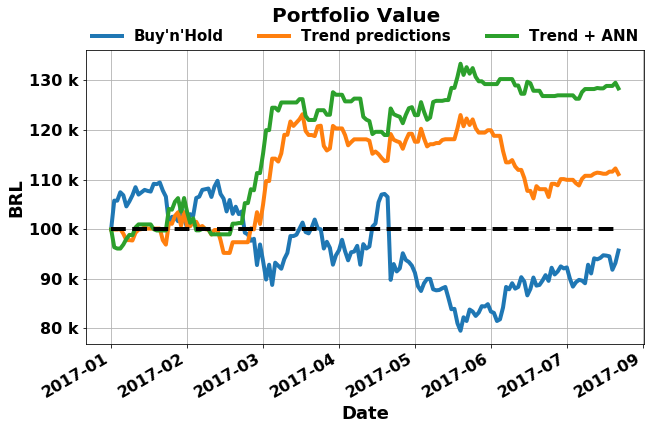

In [295]:
bt.plotSimulations(simulations = ['buy-n-hold', 'predicted_trend', 'predicted_mlp'],
                   names = ['Buy\'n\'Hold', 'Trend predictions', 'Trend + ANN'], 
                   legendsize = 15, linewidth = 4.0, figsize = (10,6), linestyle = '-',
                   saveImg = False, saveDir = saveFigDir, saveName = 'PETR4_backtest_ANNstd', saveFormat = 'pdf'
                  )

In [280]:
bt.simulate(strategy = 'buy-n-hold', start = '2017', funds = 100000, verbose = 0)

Starting buy-n-hold simulation with ['PETR4']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 95572.06 BRL


In [ ]:
plotSeries(bt.history['buy-n-hold']['portfolioValue'])
plotSeries(bt.history['buy-n-hold']['drawdown'])

In [281]:
bt.simulate(strategy = 'predicted', start = '2017', funds = 100000, 
            predicted = {'PETR4': df['PETR4_Close_trend'],
                         'ITUB4': df['ITUB4_Close_trend']
                        },
            simulationName = 'predicted_trend', verbose = 0)

Starting predicted_trend simulation with ['PETR4']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 111090.94 BRL


In [ ]:
plotSeries([bt.history['buy-n-hold']['portfolioValue'], bt.history['predicted_trend']['portfolioValue']])
plotSeries([bt.history['buy-n-hold']['drawdown'], bt.history['predicted_trend']['drawdown']])

In [282]:
bt.simulate(strategy = 'predicted', start = '2017', funds = 100000, 
            predicted = {#'PETR4': df['PETR4_Close_predicted_MLPstd'],
                         'PETR4': (df['PETR4_Close_trend'] + df['PETR4_Close_predicted_MLPstd'])/2,
                         'ITUB4': (df['ITUB4_Close_predicted_MLPstd'])
                        },
            simulationName = 'predicted_mlp', verbose = 0)

Starting predicted_mlp simulation with ['PETR4']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 128382.31 BRL


In [ ]:
plotSeries([bt.history['buy-n-hold']['portfolioValue'], bt.history['predicted_trend']['portfolioValue'], bt.history['predicted_mlp']['portfolioValue']])
plotSeries([bt.history['buy-n-hold']['drawdown'], bt.history['predicted_trend']['drawdown'], bt.history['predicted_mlp']['drawdown']])

In [283]:
bt.simulate(strategy = 'predicted', start = '2017', funds = 100000, 
            predicted = {
                         'PETR4': df['PETR4_Close'], 
                         'ITUB4': df['ITUB4_Close']
                        }, 
            simulationName = 'predicted_perfect', verbose = 0)

Starting predicted_perfect simulation with ['PETR4']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 275153.61 BRL


In [ ]:
plotSeries([bt.history['buy-n-hold']['portfolioValue'], bt.history['predicted_perfect']['portfolioValue'] ])
plotSeries([bt.history['buy-n-hold']['drawdown'], bt.history['predicted_perfect']['drawdown']])

In [31]:
def plotSeries2(series, title = None, ylabel = None, initialPlotDate = '', finalPlotDate = '', plotZeroLine = False, saveImg = False, saveDir = '', saveName = '', saveFormat = 'pdf'):
    """
    Plots the desired Series

    Parameters
    ----------
    series : pandas.Series object, pandas.Series array, or pandas.DataFrame object.
        Will plot the single Series if input is a single pandas.Series, plot all
        Series if input is an array of pandas.Series, or plot all dataframe columns
        if input is a pandas.DataFrame object. All plots will overlap in the same ax

    initialPlotDate, finalPlotDate : string (yyyy or yyyy-mm) or datetime,
    indicates which period of the series to plot. If none is provided, assumes
    first and last available samples, respectively.

    saveImg : bool, indicates wheter to save the generated plot or not

    saveDir: string, directory in wich to save generated plot

    saveName : string, set of desired lenghts to calculate moving averages

    saveFormat : string, saved image format. Default 'pdf'
    """
    if isinstance(series, pd.DataFrame):
        series = [series[column] for column in series.columns.values]
    series = [series] if isinstance(series, pd.Series) else series
    initialPlotDate = series[0][initialPlotDate].index[0] if initialPlotDate else series[0].index[0]
    finalPlotDate = series[0][finalPlotDate].index[-1] if finalPlotDate else series[0].index[-1]
    if not title:
        title = '{} ({})'.format(series[0].name, initialPlotDate.strftime('%d/%m/%Y')) if initialPlotDate == finalPlotDate else '{} ({} to {})'.format(series[0].name, initialPlotDate.strftime('%d/%m/%Y'), finalPlotDate.strftime('%d/%m/%Y'))
    if not ylabel:
        ylabel = series[0].name

    fig, ax = plt.subplots(figsize=(15,7.5), nrows = 1, ncols = 1)
    fig.suptitle(title)
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    for s in series:
        d = pd.date_range(start=s[initialPlotDate:finalPlotDate].index[0], end=s[initialPlotDate:finalPlotDate].index[-1], freq="B")
        ax.plot(np.arange(len(s[initialPlotDate:finalPlotDate])), s[initialPlotDate:finalPlotDate], 'o-')
        xticks = ax.get_xticks()
        xticklabels = [(d[0] + x).strftime('%Y-%m-%d') for x in xticks.astype(int)]
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels)
    ax.autoscale(True, axis='x')
    ax.grid()
    fig.autofmt_xdate()
    plt.legend()
    if saveImg:
        saveName = saveName if saveName else '{}'.format(s[0].name)
        fig.savefig('{}/{}.{}'.format(saveDir, saveName, saveFormat), bbox_inches='tight')
    return fig, ax